In [2]:
import pandas as pd
data_sus = pd.read_csv("/mnt/lab_data2/anusri/kumasaka/new_download/AFGR_wgs/sumstats/QTD100010.all.tsv.gz", header=0, sep='\t')


In [3]:
data_sus.head()

,molecular_trait_id,chromosome,position,ref,alt,variant,ma_samples,maf,pvalue,beta,se,type,ac,an,r2,molecular_trait_object_id,gene_id,median_tpm,rsid
0,Interval_1,1,13380,C,G,chr1_13380_C_G,6,0.036145,0.158910,0.537757,0.377599,SNP,6,166,NaN,Interval_1,Interval_1,NaN,rs571093408
1,Interval_2,1,13380,C,G,chr1_13380_C_G,6,0.036145,0.354570,0.356531,0.382530,SNP,6,166,NaN,Interval_2,Interval_2,NaN,rs571093408
2,Interval_3,1,13380,C,G,chr1_13380_C_G,6,0.036145,0.640431,-0.194644,0.414872,SNP,6,166,NaN,Interval_3,Interval_3,NaN,rs571093408
3,Interval_4,1,13380,C,G,chr1_13380_C_G,6,0.036145,0.284761,0.432374,0.401066,SNP,6,166,NaN,Interval_4,Interval_4,NaN,rs571093408
4,Interval_5,1,13380,C,G,chr1_13380_C_G,6,0.036145,0.929664,0.032113,0.362486,SNP,6,166,NaN,Interval_5,Interval_5,NaN,rs571093408


In [4]:
data_sus["position0"] = data_sus["position"] - 1

In [5]:
data_sus.columns

Index(['molecular_trait_id', 'chromosome', 'position', 'ref', 'alt', 'variant',
       'ma_samples', 'maf', 'pvalue', 'beta', 'se', 'type', 'ac', 'an', 'r2',
       'molecular_trait_object_id', 'gene_id', 'median_tpm', 'rsid',
       'position0'],
      dtype='object')

In [6]:
data_sus = data_sus[['chromosome', 'position0', 'position', 'ref', 'alt', 'variant',
       'ma_samples', 'maf', 'pvalue', 'beta', 'se', 'type', 'ac', 'an', 'r2',
       'molecular_trait_object_id', 'gene_id', 'median_tpm', 'rsid',
       'molecular_trait_id']]

In [7]:
peaks_data=pd.read_csv("/mnt/lab_data2/anusri/kumasaka/new_download/peak_metadata/QTD100010_peak_metadata.tsv.gz", sep="\t", header=0)
print(peaks_data.head())
peaks_data = peaks_data[["chromosome", "gene_start", "gene_end", "phenotype_pos", "phenotype_id"]]
peaks_data["chromosome"] = "chr"+peaks_data["chromosome"] .astype(str)
peaks_data["center"]  =  ((peaks_data["gene_start"] + peaks_data["gene_end"])/2).astype(int)
# peaks_data["start"] = peaks_data["center"] - 100
# peaks_data["end"] = peaks_data["center"] + 100
peaks_data = peaks_data[['chromosome', 'gene_start', 'gene_end', "phenotype_id"]]

  phenotype_id    quant_id    group_id     gene_id chromosome  gene_start  \
0   Interval_1  Interval_1  Interval_1  Interval_1          1       15924   
1   Interval_2  Interval_2  Interval_2  Interval_2          1       28812   
2   Interval_3  Interval_3  Interval_3  Interval_3          1       86875   
3   Interval_4  Interval_4  Interval_4  Interval_4          1       96446   
4   Interval_5  Interval_5  Interval_5  Interval_5          1      180773   

   gene_end  strand   gene_name       gene_type  phenotype_pos  \
0     17561       1  Interval_1  open_chromatin          16742   
1     29760       1  Interval_2  open_chromatin          29286   
2     87570       1  Interval_3  open_chromatin          87222   
3     96770       1  Interval_4  open_chromatin          96608   
4    182080       1  Interval_5  open_chromatin         181426   

   phenotype_length  
0              1638  
1               949  
2               696  
3               325  
4              1308  


/users/anusri/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
merged_dataframe = data_sus.merge(peaks_data, right_on=['phenotype_id'], left_on=["molecular_trait_id"], how='left')


In [10]:
merged_dataframe_n = merged_dataframe[((merged_dataframe["position"].astype(int) >= merged_dataframe["gene_start"].astype(int)) & (merged_dataframe["position"].astype(int) <= merged_dataframe["gene_end"].astype(int)))]


In [11]:

merged_dataframe_n.to_csv("af_qtls.inpeaks.effects.tsv", sep="\t", index=False, header=False)

In [12]:
merged_dataframe_n1 = merged_dataframe_n[merged_dataframe_n["ref"].str.len()==1]
merged_dataframe_n1 = merged_dataframe_n1[merged_dataframe_n1["alt"].str.len()==1]

In [13]:
merged_dataframe_n1.shape

(847696, 24)

In [14]:
merged_dataframe_n1.to_csv("local.af.effects.tsv",sep="\t", index=False, header=True)

In [15]:
merged_dataframe_n2 = merged_dataframe_n1[['chromosome_x', 'position0', 'position', 'ref', 'alt', 'molecular_trait_id',
       'variant', 'ma_samples', 'maf', 'pvalue', 'beta', 'se', 'type', 'ac',
       'an', 'r2', 'molecular_trait_object_id', 'gene_id', 'median_tpm',
       'rsid',  'gene_start', 'gene_end',
       'phenotype_id']]
merged_dataframe_n2['chromosome_x'] = "chr"+merged_dataframe_n2['chromosome_x'].astype(str)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:

import pybedtools
peaks_data_merged=pd.read_csv("/mnt/lab_data2/anusri/kumasaka/new_download/Kumasaka_2018_wgs/sumstats/merged.peaks.af.new.bed", sep="\t", header=None)
print(peaks_data_merged.head())
beds_var = pybedtools.BedTool.from_dataframe(merged_dataframe_n2)
peak_bed = pybedtools.BedTool.from_dataframe(peaks_data_merged) # this is a merged peaks file
vars_in_bed = beds_var.intersect(peak_bed, c=True)

vars_in_bedn = vars_in_bed.to_dataframe(names=merged_dataframe_n2.columns.tolist() + ["count"])


      0      1      2
0  chr1  13543  13743
1  chr1  16145  16463
2  chr1  16894  17094
3  chr1  29014  29454
4  chr1  86964  87164


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [17]:
vars_in_bedn2 = vars_in_bedn[vars_in_bedn["count"]>0]

In [80]:
vars_in_bedn2.head(1)

,chromosome_x,position0,position,ref,alt,molecular_trait_id,variant,ma_samples,maf,pvalue,...,an,r2,molecular_trait_object_id,gene_id,median_tpm,rsid,gene_start,gene_end,phenotype_id,count
2,chr1,16279,16280,T,C,Interval_1,chr1_16280_T_C,11,0.066265,0.098929,...,166,.,Interval_1,Interval_1,.,rs866639523,15924,17561,Interval_1,1


In [82]:
vars_in_bedn2.to_csv("afr.inpeaks.kaur.tsv", sep="\t", header=True, index=False)

In [69]:

import pandas as pd
import numpy as np


afrs = pd.read_csv("../final_figures_new/Afr.CaQTLS.new.tsv", sep="\t", header=0)
afrs = afrs[afrs["IsUsed"]]
afrs[["chr_hg19", "pos_hg19", "ref_hg19", "alt_hg19"]] = afrs["id_hg19"].str.split("_", expand=True)
threshold = 1 / (10**(6))
print(afrs.shape)
#print(afrs.head())
#afrs = afrs[(afrs["label"]==1) | (afrs["pval"]>1e-3)]
print(afrs.shape)
afrs["labeln"] = 1
afrs.loc[afrs["label"]==1,"labeln"]=1
afrs.loc[afrs["pval"]>1e-3,"labeln"]=-1

afrs = afrs.rename({"beta": "beta_afr"},axis='columns')
print(afrs.columns)
#print(afrs.head(1))
print(afrs.shape)
datan1 = afrs.merge(vars_in_bedn2, left_on=["allele1", "allele2", "dbsnp_rsid"], right_on=["ref", "alt", "rsid"], how="inner").drop_duplicates()
datan2 = afrs.merge(vars_in_bedn2, left_on=["allele2", "allele1", "dbsnp_rsid"], right_on=["ref", "alt", "rsid"], how="inner").drop_duplicates()
datan = pd.concat([datan1,datan2])
print(datan.shape)

(109646, 51)
(109646, 51)
Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'snp_id', 'label',
       'IsUsed', 'pval', 'beta_afr', 'enformer.encsr000emt.variantscore.sad',
       'enformer.encsr000emt.variantscore.sar', 'enformer_recomputed',
       'chrombpnet.gambian.variantscore.logfc',
       'chrombpnet.gambian.variantscore.jsd',
       'chrombpnet.esan.variantscore.logfc',
       'chrombpnet.esan.variantscore.jsd',
       'chrombpnet.mende.variantscore.logfc',
       'chrombpnet.mende.variantscore.jsd',
       'chrombpnet.yoruba.variantscore.logfc',
       'chrombpnet.yoruba.variantscore.jsd',
       'chrombpnet.maasai.variantscore.logfc',
       'chrombpnet.maasai.variantscore.jsd',
       'chrombpnet.luhya.variantscore.logfc',
       'chrombpnet.luhya.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.logfc',
       'chrombpnet.encsr637xsc.variantscore.jsd',
       'chrombpnet.encsr637xsc.variantscore.csr',
       'chrombpnet.encsr637xsc.variantscore.pval',
    

8702


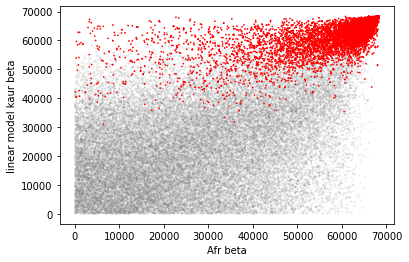

In [70]:
datan = datan1

data1 = datan
data1["log10p"] = -1*np.log(data1["pvalue"])

from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt

rank_kumasaka = rankdata(abs(data1["beta_afr"]))
rank_kaur = rankdata(abs(data1["beta"]))
colors = np.array(['grey']*data1.shape[0])
threshold=3
#colors[data1["Log10_BF"]>threshold] = 'r'
#colors[data1["RsID"].isin(dbsnp)] = 'blue'
th=5
colors[data1["log10p"]>th] = 'r'

# plt.scatter(rank_kumasaka[data1["Log10_BF"]<-1], rank_kaur[data1["Log10_BF"]<-1], alpha=0.5, s=1, color=colors[data1["Log10_BF"]<-1])
# plt.scatter(rank_kumasaka[data1["Log10_BF"]>threshold], rank_kaur[data1["Log10_BF"]>threshold], s=0.5, color=colors[data1["Log10_BF"]>threshold])

plt.scatter(rank_kumasaka[data1["log10p"]<2], rank_kaur[data1["log10p"]<2], alpha=0.1, s=1, color=colors[data1["log10p"]<2])
plt.scatter(rank_kumasaka[data1["log10p"]>th], rank_kaur[data1["log10p"]>th], s=0.5, color=colors[data1["log10p"]>th])

plt.xlabel("Afr beta")
plt.ylabel("linear model kaur beta")

print(sum(data1["log10p"]>th))


6829


Text(0, 0.5, 'linear model kaur beta')

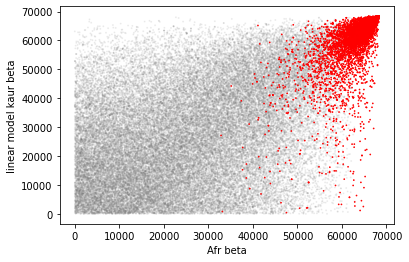

In [71]:

data1["log10p"] = -1*np.log(data1["pvalue"])
data1["log10afpval"] = -1*np.log(data1["pval"])

from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt

rank_kumasaka = rankdata(abs(data1["beta_afr"]))
rank_kaur = rankdata(abs(data1["beta"]))
colors = np.array(['grey']*data1.shape[0])
threshold=6
colors[data1["log10afpval"]>threshold] = 'r'

plt.scatter(rank_kumasaka[data1["log10afpval"]<3], rank_kaur[data1["log10afpval"]<3], alpha=0.1, s=1, color=colors[data1["log10afpval"]<3])
plt.scatter(rank_kumasaka[data1["log10afpval"]>threshold], rank_kaur[data1["log10afpval"]>threshold], s=0.5, color=colors[data1["log10afpval"]>threshold])

print(sum(data1["log10afpval"]>threshold))
plt.xlabel("Afr beta")
plt.ylabel("linear model kaur beta")




(0.8151857259560876, 0.0)

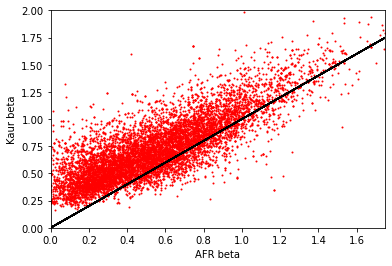

In [77]:
from scipy.stats import pearsonr
plt.scatter(abs(data1[data1["log10p"]>th]["beta_afr"]), abs(data1[data1["log10p"]>th]["beta"]), s=1, c='r')
plt.xlabel("AFR beta")
plt.ylabel("Kaur beta")
plt.plot(abs(data1[data1["log10p"]>th]["beta_afr"]), abs(data1[data1["log10p"]>th]["beta_afr"]), c='black')
plt.xlim((0,1.75))
plt.ylim((0,2))
pearsonr(abs(data1[data1["log10p"]>th]["beta_afr"]),abs(data1[data1["log10p"]>th]["beta"]))

(0.819631660058969, 0.0)

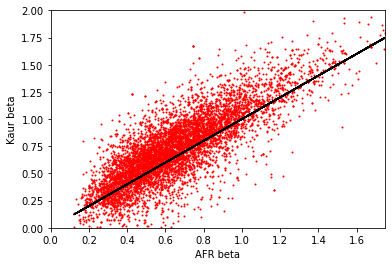

In [78]:
from scipy.stats import pearsonr
plt.scatter(abs(data1[data1["log10afpval"]>threshold]["beta_afr"]), abs(data1[data1["log10afpval"]>threshold]["beta"]), s=1, c='r')
plt.xlabel("AFR beta")
plt.ylabel("Kaur beta")
plt.plot(abs(data1[data1["log10afpval"]>threshold]["beta_afr"]), abs(data1[data1["log10afpval"]>threshold]["beta_afr"]), c='black')
plt.xlim((0,1.75))
plt.ylim((0,2))
pearsonr(abs(data1[data1["log10afpval"]>threshold]["beta_afr"]),abs(data1[data1["log10afpval"]>threshold]["beta"]))
